In [1]:
import sys
if "../src/" not in sys.path:
    sys.path.insert(0,"../src/")

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from pbcpy.local_functionals_utils import ThomasFermiEnergy, ThomasFermiPotential
from pbcpy.local_functionals_utils import vonWeizsackerEnergy, vonWeizsackerPotential
from pbcpy.semilocal_xc import Get_LibXC_Input, Get_LibXC_Output, XC, PBE
from pylibxc.functional import LibXCFunctional

import pylibxc

In [3]:
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF

In [4]:
mol = PP(filepp='Al_fde_rho.pp').read()
dens_real_space = mol.field

In [5]:
func_x = LibXCFunctional('gga_x_pbe', "unpolarized")
func_c = LibXCFunctional('gga_c_pbe', "unpolarized")

In [6]:
func_x.describe()

'Functional ID: 101\nFunctional Name: gga_x_pbe\nAttributes:\n    Name: Perdew, Burke & Ernzerhof\n    Kind: 0\n  Family: 2\nCitations:\n   J. P. Perdew, K. Burke, and M. Ernzerhof, Phys. Rev. Lett. 77, 3865 (1996)\n   J. P. Perdew, K. Burke, and M. Ernzerhof, Phys. Rev. Lett. 78, 1396 (1997)'

In [7]:
func_c.describe()

'Functional ID: 130\nFunctional Name: gga_c_pbe\nAttributes:\n    Name: Perdew, Burke & Ernzerhof\n    Kind: 1\n  Family: 2\nCitations:\n   J. P. Perdew, K. Burke, and M. Ernzerhof, Phys. Rev. Lett. 77, 3865 (1996)\n   J. P. Perdew, K. Burke, and M. Ernzerhof, Phys. Rev. Lett. 78, 1396 (1997)'

In [8]:
inp=Get_LibXC_Input(dens_real_space)

In [9]:
out_x = func_x.compute(inp)
out_c = func_c.compute(inp)

In [10]:
Functional_X = Get_LibXC_Output(out_x,dens_real_space)
Functional_C = Get_LibXC_Output(out_c,dens_real_space)

In [11]:
Functional_XC = Functional_X.sum(Functional_C)

In [12]:
exc = Functional_XC.energydensity
vxc = Functional_XC.potential
Functional_LibXC = XC(density=dens_real_space,x_str='gga_x_pbe',c_str='gga_c_pbe',polarization='unpolarized')
exc2 = Functional_LibXC.energydensity
vxc2 = Functional_LibXC.potential

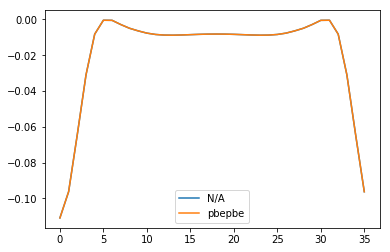

In [13]:
plt.plot(exc[0,:,0,0],label=Functional_XC.name)
plt.plot(exc2[0,:,0,0],label=Functional_LibXC.name)
plt.legend()
plt.show()

In [14]:
Functional_LibXC.name

'pbepbe'

In [15]:
Functional_LibXC.energydensity.integral()

-1.6344144237209894

In [18]:
Functional_LibXC2 = PBE(dens_real_space,'unpolarized')

In [19]:
Functional_LibXC2.name

'pbepbe'

In [20]:
Functional_LibXC2.energydensity - Functional_LibXC.energydensity

DirectField([[[[ 0.],
               [ 0.],
               [ 0.],
               ..., 
               [ 0.],
               [ 0.],
               [ 0.]],

              [[ 0.],
               [ 0.],
               [ 0.],
               ..., 
               [ 0.],
               [ 0.],
               [ 0.]],

              [[ 0.],
               [ 0.],
               [ 0.],
               ..., 
               [ 0.],
               [ 0.],
               [ 0.]],

              ..., 
              [[ 0.],
               [ 0.],
               [ 0.],
               ..., 
               [ 0.],
               [ 0.],
               [ 0.]],

              [[ 0.],
               [ 0.],
               [ 0.],
               ..., 
               [ 0.],
               [ 0.],
               [ 0.]],

              [[ 0.],
               [ 0.],
               [ 0.],
               ..., 
               [ 0.],
               [ 0.],
               [ 0.]]],


             [[[ 0.],
               [ 0.],
    